<a href="https://colab.research.google.com/github/IManasa19/Predicting-Energy-consumption/blob/main/PREDICTING_ENERGY_CONSUMPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

In [2]:
WD = pd.read_csv('/content/Manasa_weather_daily.csv')
ED = pd.read_csv('/content/Manasa_daily_dataset.csv')

In [ ]:
print("\n Weather Daily DATA:")
WD.head()


 Weather Daily DATA:


,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [ ]:
print("\n Energy Daily DATA:")
ED.head()


 Energy Daily DATA:


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22.0,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48.0,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48.0,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48.0,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48.0,0.259205,15.647,0.066


In [ ]:
print("\n Weather Daily Information:")
print(WD.info())


 Weather Daily Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    floa

In [ ]:
print("\n Energy Daily Information:")
print(ED.info())


 Energy Daily Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679167 entries, 0 to 679166
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LCLid          679167 non-null  object 
 1   day            679167 non-null  object 
 2   energy_median  679161 non-null  float64
 3   energy_mean    679161 non-null  float64
 4   energy_max     679161 non-null  float64
 5   energy_count   679166 non-null  float64
 6   energy_std     677112 non-null  float64
 7   energy_sum     679160 non-null  float64
 8   energy_min     679160 non-null  float64
dtypes: float64(7), object(2)
memory usage: 46.6+ MB
None


In [ ]:
print("\nMissing Values in Weather Daily:")
print(WD.isnull().sum())
print("\nMissing Values in Energy Daily:")
print(ED.isnull().sum())


Missing Values in Weather Daily:
temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     1
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        1
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime                    1
summary                        0
temperatureLowTime             0
apparentTemperatureMin         0
apparentT

In [ ]:
WD = WD.dropna()
ED = ED.dropna()

In [ ]:
print("\n Missing Values in Weather Daily DATA:")
print(WD.isnull().sum())
print("\n Missing Values in Energy Daily DATA:")
print(ED.isnull().sum())


 Missing Values in Weather Daily DATA:
temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     0
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        0
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime                    0
summary                        0
temperatureLowTime             0
apparentTemperatureMin         0
app

In [ ]:
if 'day' in ED.columns:
    ED['date'] = pd.to_datetime(ED['day'])

if 'time' in WD.columns:
    WD['date'] = pd.to_datetime(WD['time'])

In [ ]:
print(WD[['time', 'date']].head())

                  time       date
0  2011-11-11 00:00:00 2011-11-11
1  2011-12-11 00:00:00 2011-12-11
2  2011-12-27 00:00:00 2011-12-27
3  2011-12-02 00:00:00 2011-12-02
4  2011-12-24 00:00:00 2011-12-24


In [ ]:
print(ED[['day', 'date']].head())

          day       date
0  2011-12-15 2011-12-15
1  2011-12-16 2011-12-16
2  2011-12-17 2011-12-17
3  2011-12-18 2011-12-18
4  2011-12-19 2011-12-19


In [ ]:
# Check for outliers using statistical summaries
print("\nWeather Daily Statistical Summary:")
print(WD.describe())
print("\nEnergy Daily Statistical Summary:")
print(ED.describe())


Weather Daily Statistical Summary:
       temperatureMax  windBearing    dewPoint  cloudCover   windSpeed  \
count      881.000000   881.000000  881.000000  881.000000  881.000000   
mean        13.662747   195.712826    6.529750    0.477605    3.577696   
min         -0.060000     0.000000   -7.840000    0.000000    0.200000   
25%          9.490000   120.000000    3.180000    0.350000    2.370000   
50%         12.630000   219.000000    6.370000    0.470000    3.440000   
75%         17.920000   255.000000   10.060000    0.600000    4.570000   
max         32.400000   359.000000   17.770000    1.000000    9.960000   
std          6.185761    89.391048    4.833612    0.193514    1.690570   

          pressure  apparentTemperatureHigh  visibility    humidity  \
count   881.000000               881.000000  881.000000  881.000000   
mean   1014.151158                12.726016   11.168524    0.781782   
min     979.250000                -6.460000    1.480000    0.430000   
25%    1007.4

In [ ]:
ED

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,date
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22.0,0.239146,9.505,0.072,2011-12-15
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48.0,0.281471,14.216,0.031,2011-12-16
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48.0,0.188405,9.111,0.064,2011-12-17
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48.0,0.202919,10.511,0.065,2011-12-18
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48.0,0.259205,15.647,0.066,2011-12-19
...,...,...,...,...,...,...,...,...,...,...
679161,MAC000058,2012-12-29,0.0520,0.064521,0.241,48.0,0.049106,3.097,0.016,2012-12-29
679162,MAC000058,2012-12-30,0.0530,0.073292,0.319,48.0,0.069079,3.518,0.017,2012-12-30
679163,MAC000058,2012-12-31,0.0690,0.078708,0.274,48.0,0.056556,3.778,0.017,2012-12-31
679164,MAC000058,2013-01-01,0.0485,0.063042,0.266,48.0,0.055280,3.026,0.016,2013-01-01


In [ ]:
WD

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,date
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52,2011-11-11
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53,2011-12-11
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10,2011-12-27
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25,2011-12-02
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99,2011-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,9.03,2014-01-26 16:00:00,233,partly-cloudy-day,2.39,2014-01-26 21:00:00,0.40,4.55,1002.10,2014-01-26 22:00:00,...,2014-01-26 07:48:49,2014-01-26 16:00:00,2014-01-26 11:00:00,Mostly cloudy until evening.,2014-01-27 05:00:00,-1.30,2014-01-26 15:00:00,2014-01-27 04:00:00,0.84,2014-01-26
878,10.31,2014-02-27 14:00:00,224,partly-cloudy-day,3.08,2014-02-27 23:00:00,0.32,4.14,1007.02,2014-02-27 22:00:00,...,2014-02-27 06:51:45,2014-02-27 14:00:00,2014-02-27 12:00:00,Partly cloudy until evening.,2014-02-28 02:00:00,1.41,2014-02-27 14:00:00,2014-02-28 02:00:00,0.93,2014-02-27
879,18.97,2014-03-09 14:00:00,172,partly-cloudy-night,4.30,2014-03-09 07:00:00,0.04,2.78,1022.44,2014-03-09 07:00:00,...,2014-03-09 06:29:49,2014-03-09 14:00:00,2014-03-09 12:00:00,Partly cloudy in the evening.,2014-03-10 05:00:00,7.08,2014-03-09 14:00:00,2014-03-10 06:00:00,0.28,2014-03-09
880,8.83,2014-02-12 16:00:00,210,wind,1.94,2014-02-12 01:00:00,0.59,7.24,994.27,2014-02-12 01:00:00,...,2014-02-12 07:21:44,2014-02-12 16:00:00,2014-02-12 10:00:00,Mostly cloudy until evening and breezy through...,2014-02-13 05:00:00,-1.20,2014-02-12 16:00:00,2014-02-13 02:00:00,0.42,2014-02-12


In [ ]:
# Merge datasets on the 'date' column
ED_WD_data = pd.merge(ED, WD, on='date', how='inner')

In [ ]:
ED_WD_data.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,date,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22.0,0.239146,9.505,0.072,2011-12-15,...,7.97,2011-12-15 08:00:46,2011-12-15 14:00:00,2011-12-15 11:00:00,Partly cloudy throughout the day and breezy in...,2011-12-16 08:00:00,1.07,2011-12-15 21:00:00,2011-12-16 08:00:00,0.66
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48.0,0.281471,14.216,0.031,2011-12-16,...,4.53,2011-12-16 08:01:35,2011-12-16 15:00:00,2011-12-16 11:00:00,Mostly cloudy throughout the day.,2011-12-17 08:00:00,-2.65,2011-12-16 00:00:00,2011-12-17 08:00:00,0.70
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48.0,0.188405,9.111,0.064,2011-12-17,...,5.35,2011-12-17 08:02:21,2011-12-17 14:00:00,2011-12-17 11:00:00,Partly cloudy throughout the day.,2011-12-18 07:00:00,-3.56,2011-12-17 15:00:00,2011-12-18 06:00:00,0.73
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48.0,0.202919,10.511,0.065,2011-12-18,...,5.49,2011-12-18 08:03:04,2011-12-18 14:00:00,2011-12-18 12:00:00,Partly cloudy until evening.,2011-12-19 01:00:00,-4.12,2011-12-18 14:00:00,2011-12-19 02:00:00,0.77
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48.0,0.259205,15.647,0.066,2011-12-19,...,6.64,2011-12-19 08:03:43,2011-12-19 19:00:00,2011-12-19 11:00:00,Partly cloudy throughout the day.,2011-12-20 04:00:00,-3.67,2011-12-19 19:00:00,2011-12-20 08:00:00,0.81


In [ ]:
ED_WD_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295048 entries, 0 to 295047
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   LCLid                        295048 non-null  object        
 1   day                          295048 non-null  object        
 2   energy_median                295048 non-null  float64       
 3   energy_mean                  295048 non-null  float64       
 4   energy_max                   295048 non-null  float64       
 5   energy_count                 295048 non-null  float64       
 6   energy_std                   295048 non-null  float64       
 7   energy_sum                   295048 non-null  float64       
 8   energy_min                   295048 non-null  float64       
 9   date                         295048 non-null  datetime64[ns]
 10  temperatureMax               295048 non-null  float64       
 11  temperatureMaxTime        

In [ ]:
ED_WD_data.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min', 'date',
       'temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [ ]:
ED_WD_data.shape

(295048, 42)

In [ ]:
X_input = ED_WD_data.drop(columns=['energy_sum'])  # Drop target variable from features
y_target = ED_WD_data['energy_sum']

In [ ]:
# Select only numeric columns for scaling
X_numeric = X_input.select_dtypes(include=['number'])

In [ ]:
# Normalize all feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

In [ ]:
X_scaled.shape


(295048, 23)

In [ ]:
X_scaled

array([[ 1.64934308,  0.95336666, -0.03936929, ..., -0.12172574,
        -0.01036421,  0.55903324],
       [-0.17439971,  0.30505469,  0.30358231, ..., -1.14119704,
        -1.04574754,  0.7017915 ],
       [-0.38677151, -0.20238787, -0.29243429, ..., -0.89818354,
        -1.29902679,  0.80886019],
       ...,
       [-0.55932359, -0.73249388, -0.86079338, ..., -0.26397755,
        -0.0632467 ,  0.34489586],
       [-0.66816414, -0.8072435 , -0.87185633, ..., -0.77667678,
        -0.24416045,  0.45196455],
       [-0.62303513, -0.74780164, -0.84834756, ...,  0.43839076,
        -0.24416045,  0.55903324]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_ED_WD_PCA = pca.fit_transform(X_scaled)
print("Number of components after PCA:", X_ED_WD_PCA.shape[1])

Number of components after PCA: 12


In [ ]:
components.shape

(12, 23)

In [ ]:
X_ED_WD_PCA.shape

(295048, 12)

In [ ]:
X_ED_WD_PCA

array([[-0.96534969,  1.57300371,  1.90135217, ..., -0.57847132,
        -0.47135589, -1.17389138],
       [-2.82866439,  0.13537966, -0.18851496, ..., -0.89997072,
         0.94277982, -0.56044796],
       [-2.88896921, -0.628531  ,  0.58842081, ..., -0.13951372,
         0.23689157,  0.42217764],
       ...,
       [-0.05309436, -1.55616716,  1.18706493, ..., -0.15580611,
         0.0839817 , -0.05312984],
       [-0.77149001, -1.68899552,  0.65382153, ...,  0.31715851,
         0.59062321, -0.22450732],
       [ 2.03332345, -1.36260629, -0.84889368, ...,  1.2460472 ,
         1.2360576 ,  0.16186462]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ED_WD_PCA, y_target, test_size=0.3, random_state=42)

In [ ]:
X_train

array([[ 1.02645843, -1.75226961,  1.68632622, ..., -0.43782558,
        -0.67541767,  0.67284847],
       [ 2.91848739,  0.44442195, -1.7680888 , ..., -0.65969463,
         0.29452265,  0.40958859],
       [ 1.33762898,  1.00046141, -0.36041449, ..., -0.64396701,
        -0.69030815, -0.85364952],
       ...,
       [ 2.63177567,  3.56470815,  1.81771717, ..., -0.02286655,
        -0.20948586,  1.13204247],
       [ 1.02609274,  0.44259836, -0.40757605, ...,  0.75423098,
         0.93533343, -0.398702  ],
       [ 1.82513179, -0.56445081,  2.57889169, ...,  0.54684341,
         0.58121465,  0.03089196]])

In [ ]:
X_test[1]

array([ 5.84986133, -0.12742826, -1.10241408,  0.42461041,  0.02266429,
        2.04159379, -0.25376725,  0.14884991,  0.67015391, -0.03745769,
        0.45874533, -0.70505581])

In [ ]:
y_test

,energy_sum
159198,4.286
47101,6.029
237826,7.909
134163,18.220
194090,10.584
...,...
77845,12.330
50899,3.444
275935,6.910
111089,20.359


In [ ]:
model_ED_WD_Xgb = xgb.XGBRegressor(random_state=42)
model_ED_WD_Xgb.fit(X_train, y_train)
y_pred_xgb = model_ED_WD_Xgb.predict(X_test)

In [ ]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R-squared (R²): {r2_xgb}")

Mean Absolute Error (MAE): 0.8962243605304395
Mean Squared Error (MSE): 5.167620918286779
R-squared (R²): 0.9505488230415844


In [ ]:
import numpy as np
import xgboost as xgb

#  Input features taken from dataset for prediction o
new_data = np.array([[5.84986133, -0.12742826, -1.10241408,  0.42461041,  0.02266429,
        2.04159379, -0.25376725,  0.14884991,  0.67015391, -0.03745769,
        0.45874533, -0.70505581]])


# Predict using the trained model for the new input data
y_pred_xgb = model_ED_WD_Xgb.predict(new_data)

# Print  prediction values of the model
print("Predicted value:", y_pred_xgb)


Predicted value: [6.9979935]


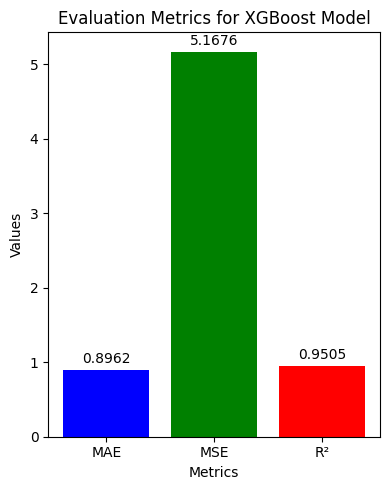

In [ ]:
# Plotting the evaluation metrics
metrics = ['MAE', 'MSE', 'R²']
values = [mae_xgb, mse_xgb, r2_xgb]

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 5))

# Create a bar plot
ax.bar(metrics, values, color=['blue', 'green', 'red'])

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Evaluation Metrics for XGBoost Model')

# Show the value on top of each bar
for i, value in enumerate(values):
    ax.text(i, value + 0.05, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_ED_WD_GB = GradientBoostingRegressor(random_state=42)
model_ED_WD_GB.fit(X_train, y_train)
y_pred_gb = model_ED_WD_GB.predict(X_test)

In [ ]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R²): {r2_gb}")

Mean Absolute Error (MAE): 0.9023300398251978
Mean Squared Error (MSE): 2.0221069930339204
R-squared (R²): 0.980649592467684


In [ ]:
#  Input features taken from dataset for prediction
new_data = np.array([[5.84986133, -0.12742826, -1.10241408,  0.42461041,  0.02266429,
        2.04159379, -0.25376725,  0.14884991,  0.67015391, -0.03745769,
        0.45874533, -0.70505581]])


# Predict using the trained model for the new input data
y_pred_gb = model_ED_WD_GB.predict(new_data)

# Print  prediction values of the model
print("Predicted value:", y_pred_gb)


Predicted value: [7.52112647]


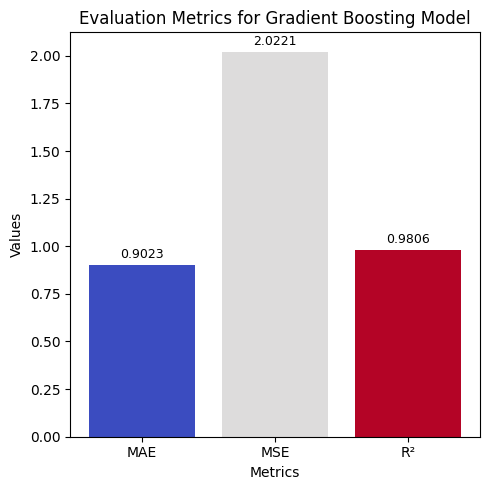

In [ ]:
# List of metrics and their values
metrics = ['MAE', 'MSE', 'R²']
values = [mae_gb, mse_gb, r2_gb]

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 5))

# Create a bar plot with gradient colors
cmap = plt.get_cmap('coolwarm')
bars = ax.bar(metrics, values, color=cmap(np.linspace(0, 1, len(values))))

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Evaluation Metrics for Gradient Boosting Model')

# Show the value on top of each bar
for i, value in enumerate(values):
    ax.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Initialize the MLPRegressor with optimized parameters
model_ED_WD_ANN = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # Two hidden layers with 128 and 64 neurons
    activation='relu',            # Activation function
    solver='adam',                # Optimizer
    alpha=0.001,                  # L2 regularization term
    learning_rate='adaptive',     # Learning rate schedule
    max_iter=2000,                # Increased max iterations for better convergence
    random_state=42,
    verbose=True
)

In [ ]:
# Train the model
model_ED_WD_ANN.fit(X_train, y_train)

Iteration 1, loss = 4.74488815
Iteration 2, loss = 0.97268815
Iteration 3, loss = 0.96009754
Iteration 4, loss = 0.96281206
Iteration 5, loss = 0.95886082
Iteration 6, loss = 0.95302377
Iteration 7, loss = 0.95283801
Iteration 8, loss = 0.95376825
Iteration 9, loss = 0.95028888
Iteration 10, loss = 0.94076898
Iteration 11, loss = 0.93907832
Iteration 12, loss = 0.94766304
Iteration 13, loss = 0.93639767
Iteration 14, loss = 0.93724434
Iteration 15, loss = 0.93573018
Iteration 16, loss = 0.93321444
Iteration 17, loss = 0.93070361
Iteration 18, loss = 0.93858856
Iteration 19, loss = 0.93056506
Iteration 20, loss = 0.92935498
Iteration 21, loss = 0.93015787
Iteration 22, loss = 0.92714247
Iteration 23, loss = 0.92435092
Iteration 24, loss = 0.92592144
Iteration 25, loss = 0.92701265
Iteration 26, loss = 0.92675948
Iteration 27, loss = 0.91876670
Iteration 28, loss = 0.92135678
Iteration 29, loss = 0.92134798
Iteration 30, loss = 0.91804863
Iteration 31, loss = 0.91647925
Iteration 32, los

MLPRegressor(alpha=0.001, hidden_layer_sizes=(128, 64),
             learning_rate='adaptive', max_iter=2000, random_state=42,
             verbose=True)

In [ ]:
# Predict on the test set
y_pred__ANN = model_ED_WD_ANN.predict(X_test)


In [ ]:
# Evaluate the model
mae_ann = mean_absolute_error(y_test, y_pred__ANN)
mse_ann = mean_squared_error(y_test, y_pred__ANN)
r2_ann = r2_score(y_test, y_pred__ANN)

print(f"Mean Absolute Error (MAE): {mae_ann}")
print(f"Mean Squared Error:, {mse_ann}")
print(f"R-squared (R²): {r2_ann}")

Mean Absolute Error (MAE): 0.5514303955977582
Mean Squared Error:, 0.8818506326598653
R-squared (R²): 0.9915611937531572


In [ ]:
#  Input features taken from dataset for prediction
new_data = np.array([[5.84986133, -0.12742826, -1.10241408,  0.42461041,  0.02266429,
        2.04159379, -0.25376725,  0.14884991,  0.67015391, -0.03745769,
        0.45874533, -0.70505581]])


# Predict using the trained model for the new input data
y_pred_ann_pred = model_ED_WD_ANN.predict(new_data)

# Print  prediction values of the model
print("Predicted value:", y_pred_ann_pred)

Predicted value: [6.50688892]


<ipython-input-167-16bf5c47eb24>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics, rotation=0, fontsize=9)


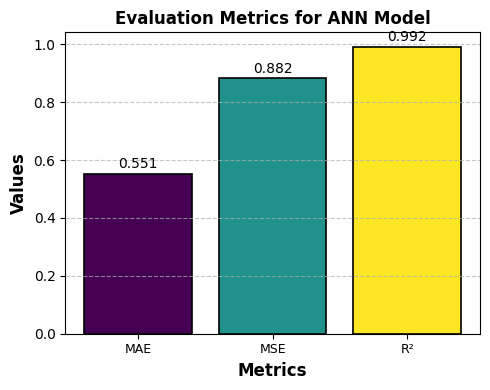

In [ ]:
# List of metrics and their values
metrics = ['MAE', 'MSE', 'R²']
values = [mae_ann, mse_ann, r2_ann]

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 4))

# Create a gradient colormap
cmap = plt.get_cmap('viridis')
bars = ax.bar(metrics, values, color=cmap(np.linspace(0, 1, len(values))), edgecolor='black', linewidth=1.2)

# Add labels and title
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Values', fontsize=12, fontweight='bold')
ax.set_title('Evaluation Metrics for ANN Model', fontsize=12, fontweight='bold')

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with their respective values
for i, value in enumerate(values):
    ax.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=10
            )

# Customize x-axis labels and rotation for better fit
ax.set_xticklabels(metrics, rotation=0, fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

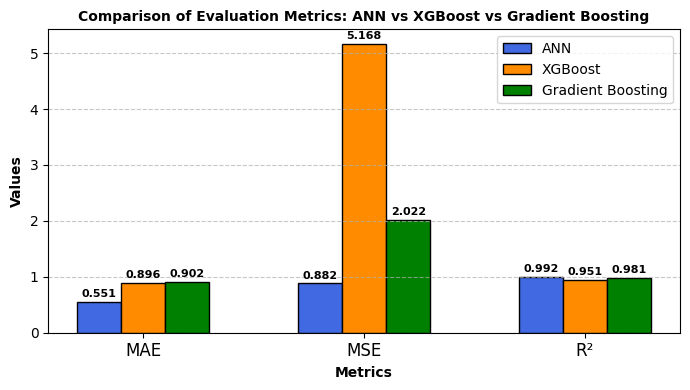

In [ ]:
# Grouped bar chart data
metrics = ['MAE', 'MSE', 'R²']
ann_values = [mae_ann, mse_ann, r2_ann]
xgb_values = [mae_xgb, mse_xgb, r2_xgb]
gb_values = [mae_gb, mse_gb, r2_gb]

# Set up the plot
fig, ax = plt.subplots(figsize=(7, 4))

# Set the bar width
bar_width = 0.2

# Set positions for the bars
index = np.arange(len(metrics))

# Create bars for ANN, XGBoost, and Gradient Boosting
bars_ann = ax.bar(index - bar_width, ann_values, bar_width, label='ANN', color='royalblue', edgecolor='black')
bars_xgb = ax.bar(index, xgb_values, bar_width, label='XGBoost', color='darkorange', edgecolor='black')
bars_gb = ax.bar(index + bar_width, gb_values, bar_width, label='Gradient Boosting', color='green', edgecolor='black')

# Add labels and title
ax.set_xlabel('Metrics', fontsize=10, fontweight='bold')
ax.set_ylabel('Values', fontsize=10, fontweight='bold')
ax.set_title('Comparison of Evaluation Metrics: ANN vs XGBoost vs Gradient Boosting', fontsize=10, fontweight='bold')

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with their respective values
for i, (ann_val, xgb_val, gb_val) in enumerate(zip(ann_values, xgb_values, gb_values)):
    ax.text(i - bar_width, ann_val + 0.05, f'{ann_val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    ax.text(i, xgb_val + 0.05, f'{xgb_val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    ax.text(i + bar_width, gb_val + 0.05, f'{gb_val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Set x-axis ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(metrics, fontsize=12)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()